In [2]:
# -*- coding: utf-8 -*-
"""
Following are the DHR tasks followed in this example code:
    
    -- Applying Morphological Black-Hat transformation
    -- Creating the mask for InPainting task
    -- Applying inpainting algorithm on the image

"""

# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import cv2

(183, 275, 3)


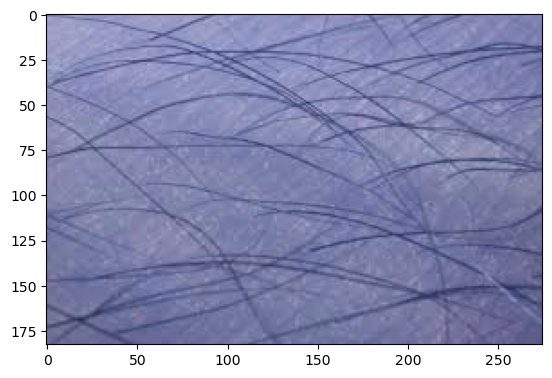

In [8]:
src = cv2.imread("inputImages/sample1.jpg")
print(src.shape)
plt.imshow(src)

True

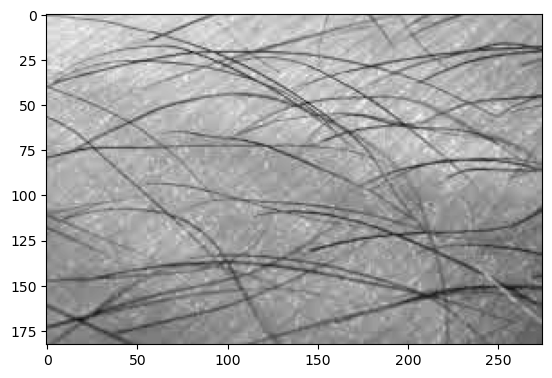

In [4]:
# Convert the original image to grayscale
grayScale = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
plt.imshow(grayScale, cmap='gray')
cv2.imwrite('grayScale_sample1.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

True

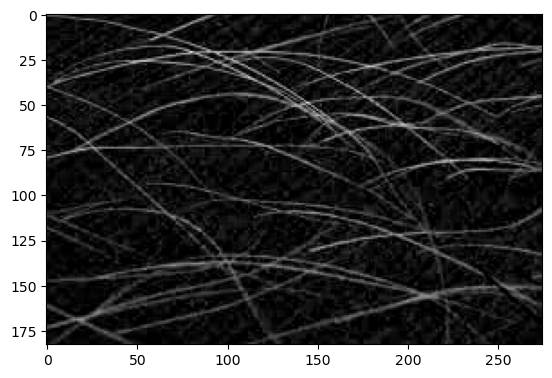

In [5]:
# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

# Perform the blackHat filtering on the grayscale image to find the 
# hair countours
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat, cmap='gray')
cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

True

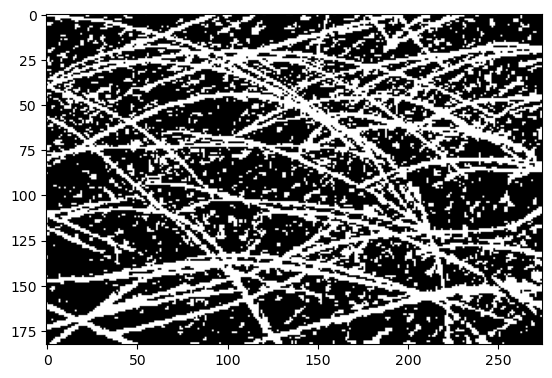

In [6]:
# intensify the hair countours in preparation for the inpainting 
# algorithm
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
plt.imshow(thresh2, cmap='gray')
cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

True

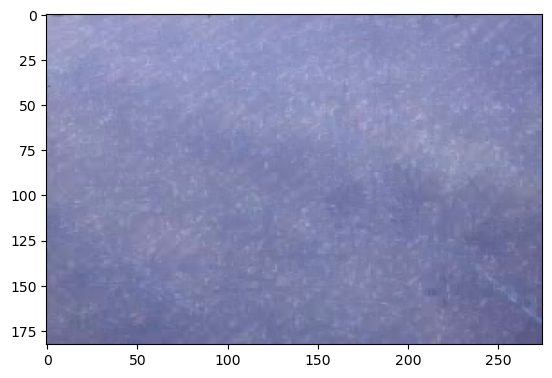

In [9]:
# inpaint the original image depending on the mask
dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA)
plt.imshow(dst)
cv2.imwrite('InPainted_sample1.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])